In [1]:
# Let's import some libraries first
import torch
from torch import optim
from torch import  nn
import torch.nn.functional as F

# 0. Introduction to Pytorch 
There are different architectures for Neural Networks (NNs). Those architectures are defined by blocks called layers. In this notebook we will learn how to use common layers to build a neural networks from scratch. We will also learn how to train the neural network using the `Pytorch` library and evaluate its performance.

In Pytorch, we can organise those layers using containers. The most common one that we will use is the `torch.nn.Sequential` layer.

In a sequential container, the modules (including activation functions and layers) will be added to it in the order they are passed. Alternatively, an ordered dictionary of modules can also be passed in.

To make it easier to understand, here is a small example:

Source: [Pytorch Sequential](https://pytorch.org/docs/stable/generated/torch.nn.Sequential.html)

```python

# Import OrderedDict, which is in the standard collection library for python
from collections import OrderedDict

# Import nn to use basic building blocks
import torch.nn as nn

# Example of using Sequential
model = nn.Sequential(
          nn.Conv2d(1,20,5), # This is a Convolutional Layer 
          nn.ReLU(),         # This is an activation function
          nn.Conv2d(20,64,5),
          nn.ReLU()
        )

# Example of using Sequential with OrderedDict
# This is equivalent to the first model
model = nn.Sequential(OrderedDict([
          ('conv1', nn.Conv2d(1,20,5)),
          ('relu1', nn.ReLU()),
          ('conv2', nn.Conv2d(20,64,5)),
          ('relu2', nn.ReLU())
        ]))
```

As you can notice from the examples, `nn` contains the basic building blocks for Neural Networks as well as activiation functions, loss functions and some other useful functions.

## 1. Layers in Pytorch


### 1.2 Linear (or Dense) Layer

Fully connected neural networks (FCNNs) are a type of artificial neural network where  all the neurones, in one layer are connected to the neurones in the next layer. This type of layer is defined in Pytorch by [`nn.Linear`](https://pytorch.org/docs/stable/generated/torch.nn.Linear.html#torch.nn.Linear).

### 1.3 Convolutional Neural Networks

Convolutional layer
The convolutional layer is the core building block of a CNN. The layer's parameters consist of a set of learnable filters (or kernels), which have a small receptive field, but extend through the full depth of the input volume. During the forward pass, each filter is convolved across the width and height of the input volume, computing the dot product between the entries of the filter and the input and producing a 2-dimensional activation map of that filter. As a result, the network learns filters that activate when it detects some specific type of feature at some spatial position in the input

Source: [CNNs](https://en.wikipedia.org/wiki/Convolutional_neural_network)

> In deep learning, a convolutional neural network (CNN, or ConvNet) is a class of deep neural networks, most commonly applied to images. They have applications in image and video recognition, recommender systems, image classification, medical image analysis, natural language processing, and financial time series. <br/>
CNNs are regularized versions of multilayer perceptrons. Multilayer perceptrons usually mean fully connected networks, that is, each neuron in one layer is connected to all neurons in the next layer. The "fully-connectedness" of these networks makes them prone to overfitting data. Typical ways of regularization include adding some form of magnitude measurement of weights to the loss function. CNNs take a different approach towards regularization: they take advantage of the hierarchical pattern in data and assemble more complex patterns using smaller and simpler patterns. Therefore, on the scale of connectedness and complexity, CNNs are on the lower extreme.

<h4>Architecture in a CNN:</h4>

> A convolutional neural network consists of an input and an output layer, as well as multiple hidden layers. The hidden layers of a CNN typically consist of a series of convolutional layers that convolve with a multiplication or other dot product. The activation function is commonly a RELU layer, and is subsequently followed by additional convolutions such as pooling layers, fully connected layers and normalization layers, referred to as hidden layers because their inputs and outputs are masked by the activation function and final convolution.

<h4> CNN Layer: </h4>

<div class="alert alert-info" style="font-size:100%">

**NOTE:** <br>
Use `nn.Conv2d` in Pytorch for 2d Convolutions.
</div>

> When programming a CNN, the input is a tensor with shape (number of images) x (image height) x (image width) x (image depth). Then after passing through a convolutional layer, the image becomes abstracted to a feature map, with shape (number of images) x (feature map height) x (feature map width) x (feature map channels). A convolutional layer within a neural network should have the following attributes:
- Convolutional kernels defined by a width and height (hyper-parameters).
- The number of input channels and output channels (hyper-parameter).
- The depth of the Convolution filter (the input channels) must be equal to the number channels (depth) of the input feature map. <br>

In a CNNs, feature maps are extracted and the they are downsampled until the last layer where it usually have fully connected layer. Look at the examples in the image below:

[Source Image](https://en.wikipedia.org/wiki/Convolutional_neural_network#/media/File:Typical_cnn.png)
<img src='https://upload.wikimedia.org/wikipedia/commons/6/63/Typical_cnn.png' width=800 height=300>


> In neural networks, each neuron receives input from some number of locations in the previous layer. In a fully connected layer, each neuron receives input from every element of the previous layer. In a convolutional layer, neurons receive input from only a restricted subarea of the previous layer. Typically the subarea is of a square shape (e.g., size 5 by 5). The input area of a neuron is called its receptive field. So, in a fully connected layer, the receptive field is the entire previous layer. In a convolutional layer, the receptive area is smaller than the entire previous layer. The subarea of the original input image in the receptive field is increasingly growing as getting deeper in the network architecture. This is due to applying over and over again a convolution which takes into account the value of a specific pixel, but also some surrounding pixels.

<h4> Pooling Layers</h4>

<div class="alert alert-info" style="font-size:100%">

**NOTE:** <br>
Use `nn.maxpoo2d` in Pytorch for 2d Max Pooling.
</div>

> Another important concept of CNNs is pooling, which is a form of non-linear down-sampling. There are several non-linear functions to implement pooling among which max pooling is the most common. It partitions the input image into a set of non-overlapping rectangles and, for each such sub-region, outputs the maximum.

The example below, shows Max pooling with a 2x2 filter and stride = 2. In every sub-region, the max value obtained.

[Source Image](https://en.wikipedia.org/wiki/Convolutional_neural_network#/media/File:Max_pooling.png)
<img src='https://upload.wikimedia.org/wikipedia/commons/e/e9/Max_pooling.png' width=400 heigh=400/>

# CNN implementation in Pytorch

Data source: https://dataunderground.org/dataset/landmass-f3

Credits to researchers at Georgia Tech, Agile Geoscience
License CCbySA

In this notebook, we will be using the landmass dataset, which have been preprocessed already. In this dataset, we have images of 4 different types of landmass: 'Chaotic Horizon', 'Fault', 'Horizon', 'Salt Dome'.

We will train a CNN to learn how to classify images into those 4 groups.

In [2]:
# Let's import the Patches
from deep_ml_curriculum.data.landmass_f3 import LandmassF3Patches
from deep_ml_curriculum.config import project_dir

landmassf3_train = LandmassF3Patches(project_dir / 'data/processed/landmass-f3', train=True)
landmassf3_test = LandmassF3Patches(project_dir / 'data/processed/landmass-f3', train=False)
print(landmassf3_train)
print(landmassf3_test)

Dataset LandmassF3Patches
    Number of datapoints: 13250
    Root location: /home/wassname/notebooks/deep_ml_curriculum_private/data/processed/landmass-f3
    Split: Train
Dataset LandmassF3Patches
    Number of datapoints: 4417
    Root location: /home/wassname/notebooks/deep_ml_curriculum_private/data/processed/landmass-f3
    Split: Test


In [3]:
# Let's have a look at the dataset
print(landmassf3_train.data.shape)
print(landmassf3_test.data.shape)

torch.Size([13250, 99, 99])
torch.Size([4417, 99, 99])


In [4]:
LandmassF3Patches

deep_ml_curriculum.data.landmass_f3.LandmassF3Patches

In this dataset, we have a total of 13250 gray-scale images of 99x99 pixels.

Let's display the first one:

Class: Chaotic Horizon


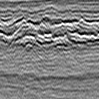

In [5]:
x,y=landmassf3_train[4]
print('Class:', landmassf3_train.classes[y])
x

In [6]:
landmassf3_train.classes

['Chaotic Horizon', 'Fault', 'Horizon', 'Salt Dome']

Source: [Neural Networks](https://pytorch.org/tutorials/beginner/blitz/neural_networks_tutorial.html#sphx-glr-beginner-blitz-neural-networks-tutorial-py)

Now let's implement our first NN from scratch using Pytorch. A typical training procedure for a neural network is as follows:

- Define the neural network that has some learnable parameters (or weights)
- Iterate over a dataset of inputs
- Process input through the network
- Compute the loss (how far is the output from being correct)
- Propagate gradients back into the network’s parameters
- Update the weights of the network, typically using a simple update rule: weight = weight - learning_rate * gradient

Steps:

1. Create a python class with `nn.Module`
2. Let's define two functions:
   - The first one `__init__` also called contructor. Here we wil define the blocks that we will use.
   - Define a `forward` function. In Pytorch, `forward` is a reserved name for a function that takes the input and returns and output. You can define the flow of the architecture here.
   
   
<h3> Define the network</h3>

In [7]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        # 1 input image channel, 6 output channels, 3x3 square convolution
        # kernel
        self.conv1 = nn.Conv2d(1, 6, 3)
        self.conv2 = nn.Conv2d(6, 16, 3)
        # an affine operation: y = Wx + b
        self.fc1 = nn.Linear(16 * 23 * 23, 120)  # 6*6 from image dimension
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 4)

    def forward(self, x):
        # Max pooling over a (2, 2) window
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        # If the size is a square you can only specify a single number
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = x.view(-1, self.num_flat_features(x))
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

    def num_flat_features(self, x):
        size = x.size()[1:]  # all dimensions except the batch dimension
        num_features = 1
        for s in size:
            num_features *= s
        return num_features

In [8]:
# Create an instance of your network
net = Net()
print(net)

Net(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=8464, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=4, bias=True)
)


Let's try a random 99x99 input. The input image to follow this convention:

(N, C, W, H)
- N: Number of images in the batch
- C: Number of channels. Use 1 for grayscale or 3 for colored images (RGB)
- W: Width
- H: Height


In [9]:
input = torch.rand(1,1,99,99)
out = net(input)

# An array with 4 output, each one corresponding to 
print(out)

tensor([[ 0.0580,  0.0611,  0.0498, -0.0283]], grad_fn=<AddmmBackward>)


Now let's define a function for training our ConvNet.

But first, we will define some hyperparameters:

- `n_epochs`: is the number of iterations over all dataset
- `learning_rate`: is the size of the steps in the optimization process.
- `momentum`: helps accelerate gradients vectors in the right directions, thus leading to faster converging.
- `bs`: batch size corresponds to the number of images evaluated at the time

In [10]:
# Let's define some hyperparameter first
n_epochs = 3         
learning_rate = 0.001
momentum = 0.5
bs = 64

# Loss function
criterion = nn.CrossEntropyLoss()

# Define Optimizer. In this case, we will use Stochastic Gradient Descent
optimizer = optim.SGD(net.parameters(), lr=learning_rate,
                      momentum=momentum)

# Let's disable GPU for this example
torch.backends.cudnn.enabled = False
# For reproducibility
torch.manual_seed(2020)

In [11]:
x_train = landmassf3_train.data / 255.
y_train = landmassf3_train.targets
x_test = landmassf3_test.data / 255.
y_test = landmassf3_test.targets
n = x_train.shape[0]

Let's create the function for training:

[Source of code](https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html)

In [12]:
def train(model, x, y, criterion, optimizer, n_epochs=1, bs=64):
    # Set model in train mode
    model.train()
    running_loss = 0.0
    for epoch in range(n_epochs):
        for i in range((x_train.shape[0] - 1) // bs + 1):
            # Let's divide the data in batches
            start_i = i * bs
            end_i = start_i + bs
            inputs = x_train[start_i:end_i].unsqueeze(1).float()
            labels = y_train[start_i:end_i].long()
            # zero the parameter gradients
            optimizer.zero_grad()
            # forward + backward + optimize
            outputs = model(inputs)              # Get the prediction here
            loss = criterion(outputs, labels)  # Calculate loss
            loss.backward()                    # Do backpropagation
            optimizer.step()                   # Update weights
            # print statistics
            running_loss += loss.item()
            if i % 10 == 9:
                print('[%d, %5d] loss: %.3f' %
                      (epoch + 1, i + 1, running_loss / 2000))
                running_loss = 0.0

    print('Finished Training')
    return model

In [13]:
def test(model, x, y):
    model.eval()
    
    correct = 0
    total = 0
    
    for idx, image in enumerate(x):
        pred = model(image.unsqueeze(0).unsqueeze(0)).argmax()
        if int(pred) == int(y[idx]):
            correct += 1
        total += 1
    
    print(correct, total)
    accuracy = 100 * (correct/total)
    return accuracy

In [14]:
# Define Optimizer. In this case, we will use Stochastic Gradient Descent
optimizer = optim.SGD(net.parameters(), lr=learning_rate,
                      momentum=momentum)
# Now let's train the model
model = train(net, x_train, y_train, criterion, optimizer)
test(model, x_test, y_test)

[1,    10] loss: 0.007
[1,    20] loss: 0.007
[1,    30] loss: 0.007
[1,    40] loss: 0.007
[1,    50] loss: 0.007
[1,    60] loss: 0.007
[1,    70] loss: 0.006
[1,    80] loss: 0.006
[1,    90] loss: 0.006
[1,   100] loss: 0.006
[1,   110] loss: 0.006
[1,   120] loss: 0.006
[1,   130] loss: 0.006
[1,   140] loss: 0.006
[1,   150] loss: 0.006
[1,   160] loss: 0.006
[1,   170] loss: 0.006
[1,   180] loss: 0.006
[1,   190] loss: 0.006
[1,   200] loss: 0.006
Finished Training
2371 4417


53.678967625084894

Let's try again with 1 more epochs...

In [15]:
net2 = Net()
# Define Optimizer. In this case, we will use Stochastic Gradient Descent
optimizer = optim.SGD(net2.parameters(), lr=learning_rate,
                      momentum=momentum)
model = train(net, x_train, y_train, criterion, optimizer, n_epochs=2)
print('Testing accuracy on unseen data...')
test(model, x_test, y_test)

[1,    10] loss: 0.006
[1,    20] loss: 0.006
[1,    30] loss: 0.006
[1,    40] loss: 0.006
[1,    50] loss: 0.006
[1,    60] loss: 0.006
[1,    70] loss: 0.006
[1,    80] loss: 0.006
[1,    90] loss: 0.006
[1,   100] loss: 0.006
[1,   110] loss: 0.006
[1,   120] loss: 0.006
[1,   130] loss: 0.006
[1,   140] loss: 0.006
[1,   150] loss: 0.006
[1,   160] loss: 0.006
[1,   170] loss: 0.006
[1,   180] loss: 0.006
[1,   190] loss: 0.006
[1,   200] loss: 0.006
[2,    10] loss: 0.010
[2,    20] loss: 0.006
[2,    30] loss: 0.006
[2,    40] loss: 0.006
[2,    50] loss: 0.006
[2,    60] loss: 0.006
[2,    70] loss: 0.006
[2,    80] loss: 0.006
[2,    90] loss: 0.006
[2,   100] loss: 0.006
[2,   110] loss: 0.006
[2,   120] loss: 0.006
[2,   130] loss: 0.006
[2,   140] loss: 0.006
[2,   150] loss: 0.006
[2,   160] loss: 0.006
[2,   170] loss: 0.006
[2,   180] loss: 0.006
[2,   190] loss: 0.006
[2,   200] loss: 0.006
Finished Training
Testing accuracy on unseen data...
2371 4417


53.678967625084894

In [16]:
net2 = Net()
# Define Optimizer. In this case, we will use Stochastic Gradient Descent
optimizer = optim.SGD(net2.parameters(), lr=learning_rate,
                      momentum=momentum)
model = train(net, x_train, y_train, criterion, optimizer, n_epochs=5)
print('Testing accuracy on unseen data...')
test(model, x_test, y_test)

[1,    10] loss: 0.006
[1,    20] loss: 0.006
[1,    30] loss: 0.006
[1,    40] loss: 0.006
[1,    50] loss: 0.006
[1,    60] loss: 0.006
[1,    70] loss: 0.006
[1,    80] loss: 0.006
[1,    90] loss: 0.006
[1,   100] loss: 0.006
[1,   110] loss: 0.006
[1,   120] loss: 0.006
[1,   130] loss: 0.006
[1,   140] loss: 0.006
[1,   150] loss: 0.006
[1,   160] loss: 0.006
[1,   170] loss: 0.006
[1,   180] loss: 0.006
[1,   190] loss: 0.006
[1,   200] loss: 0.006
[2,    10] loss: 0.010
[2,    20] loss: 0.006
[2,    30] loss: 0.006
[2,    40] loss: 0.006
[2,    50] loss: 0.006
[2,    60] loss: 0.006
[2,    70] loss: 0.006
[2,    80] loss: 0.006
[2,    90] loss: 0.006
[2,   100] loss: 0.006
[2,   110] loss: 0.006
[2,   120] loss: 0.006
[2,   130] loss: 0.006
[2,   140] loss: 0.006
[2,   150] loss: 0.006
[2,   160] loss: 0.006
[2,   170] loss: 0.006
[2,   180] loss: 0.006
[2,   190] loss: 0.006
[2,   200] loss: 0.006
[3,    10] loss: 0.010
[3,    20] loss: 0.006
[3,    30] loss: 0.006
[3,    40] 

53.678967625084894

We trained the same model using `SGD` for 1, 2, and 5 epochs. At some point, it seems like the model is not converging in it got stucked in a local minima. To improve the results we will tray a couple of things:

1. Create a new model with `Batch Normalization`, it is often used in modern CNN architectures because it helps to create more general models (regularization) preventing overfitting.
2. Change `SGD` for `Adam` optimizer. `Adam` is known to converge faster than `SGD`.
3. We will train longer (more epochs).


In [17]:
class BetterCNN(nn.Module):
    
    def __init__(self):
        super(BetterCNN, self).__init__()
        
        self.layer1 = nn.Sequential(
            nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        
        self.layer2 = nn.Sequential(
            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        
        self.layer3 = nn.Sequential(
            nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        
        self.fc1 = nn.Linear(in_features=128*10*10, out_features=512)
        self.drop = nn.Dropout2d(0.25)
        self.fc2 = nn.Linear(in_features=512, out_features=128)
        self.fc3 = nn.Linear(in_features=128, out_features=4)
        
    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = self.layer3(out)
        #print(out.shape)
        out = out.view(out.size(0), -1)
        #print(out.shape)
        out = self.fc1(out)
        out = self.drop(out)
        out = self.fc2(out)
        out = self.fc3(out)
        
        return out

Let's see first the results training the new model using only 1 epoch.

In [18]:
convnet = BetterCNN()
optimizer = torch.optim.Adam(convnet.parameters(), lr=learning_rate)
model = train(convnet, x_train, y_train, criterion, optimizer)
test(model, x_test, y_test)

[1,    10] loss: 0.066
[1,    20] loss: 0.012
[1,    30] loss: 0.003
[1,    40] loss: 0.002
[1,    50] loss: 0.001
[1,    60] loss: 0.000
[1,    70] loss: 0.001
[1,    80] loss: 0.000
[1,    90] loss: 0.000
[1,   100] loss: 0.000
[1,   110] loss: 0.000
[1,   120] loss: 0.000
[1,   130] loss: 0.000
[1,   140] loss: 0.000
[1,   150] loss: 0.000
[1,   160] loss: 0.000
[1,   170] loss: 0.000
[1,   180] loss: 0.000
[1,   190] loss: 0.000
[1,   200] loss: 0.000
Finished Training
2151 4417


48.69821145573919

If we check the loss, we can notice that Adam is converging faster. However, the model is clearly underfitted. Let's train now the model for 10 epochs more:

In [19]:
learning_rate = 1e-3
convnet2 = BetterCNN()
optimizer = torch.optim.Adam(convnet2.parameters(), lr=learning_rate)
model = train(convnet2, x_train, y_train, criterion, optimizer, n_epochs=10)
test(model, x_test, y_test)

[1,    10] loss: 0.061
[1,    20] loss: 0.011
[1,    30] loss: 0.003
[1,    40] loss: 0.001
[1,    50] loss: 0.001
[1,    60] loss: 0.000
[1,    70] loss: 0.001
[1,    80] loss: 0.000
[1,    90] loss: 0.000
[1,   100] loss: 0.000
[1,   110] loss: 0.000
[1,   120] loss: 0.000
[1,   130] loss: 0.000
[1,   140] loss: 0.000
[1,   150] loss: 0.000
[1,   160] loss: 0.000
[1,   170] loss: 0.000
[1,   180] loss: 0.000
[1,   190] loss: 0.000
[1,   200] loss: 0.000
[2,    10] loss: 0.019
[2,    20] loss: 0.003
[2,    30] loss: 0.001
[2,    40] loss: 0.000
[2,    50] loss: 0.000
[2,    60] loss: 0.000
[2,    70] loss: 0.000
[2,    80] loss: 0.000
[2,    90] loss: 0.000
[2,   100] loss: 0.000
[2,   110] loss: 0.000
[2,   120] loss: 0.000
[2,   130] loss: 0.000
[2,   140] loss: 0.000
[2,   150] loss: 0.000
[2,   160] loss: 0.000
[2,   170] loss: 0.000
[2,   180] loss: 0.000
[2,   190] loss: 0.000
[2,   200] loss: 0.000
[3,    10] loss: 0.031
[3,    20] loss: 0.006
[3,    30] loss: 0.003
[3,    40] 

98.23409553995924

Finally ! After changing the optimizer, creating a better CNN architecture and train for a couple of epochs we got an accuracy of over 99% on unseen data.

In [20]:
# Now that we finished the training let's save our best model
PATH = './landmass_net.pth'
torch.save(model.state_dict(), PATH)

Now let's load a new model to check that the performance of the saved model.

Check more information about how to save models in Pytorch [here](https://pytorch.org/tutorials/beginner/saving_loading_models.html)

# References and further reading

[Artificial Neural Networks](https://en.wikipedia.org/wiki/Artificial_neural_network)

[Pytorch](https://pytorch.org/)

[Stochastic Gradient Descent](https://en.wikipedia.org/wiki/Stochastic_gradient_descent)

[Adam](https://arxiv.org/pdf/1412.6980.pdf)
